1. The European Social Survey 10 Dataset. Classification by country. Took two different countries and 8 parameters

[Text(0.5, 1.0, 'Immigrants make country worse or better place to live')]

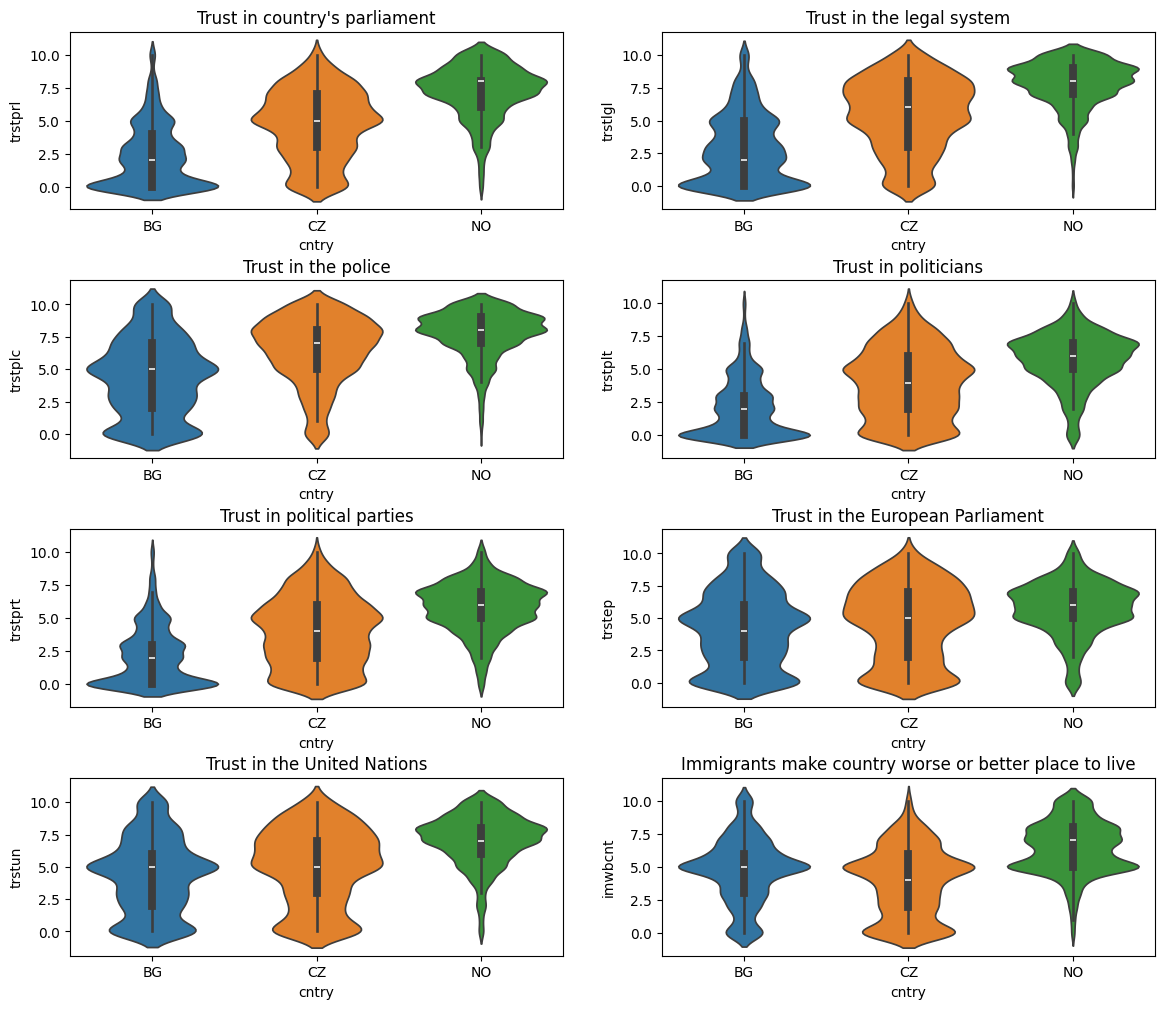

In [15]:
import rbfn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

ess = pd.read_csv("./data/ESS10.csv")
indexes = pd.read_csv("./data/s_indexes.csv")
ess[indexes["shortn"]].to_csv("./data/cleared_input.csv", index=False)
data = pd.read_csv("./data/cleared_input.csv")
data = data[data[:].isin([77,88,99]) == False].dropna()
data = data[data["cntry"].isin(['BE','CH','EE','FI','FR','GB','GR','HR','HU','IE','IS','IT','LT','ME','MK','NL','PT','SI','SK'])== False].dropna()

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(14, 12))
plt.subplots_adjust(hspace = 0.4)
sns.violinplot(x="cntry", y="trstprl",  data=data, ax=ax1,  hue="cntry").set(title="Trust in country's parliament")
sns.violinplot(x="cntry", y="trstlgl", data=data, ax=ax2, hue="cntry").set(title="Trust in the legal system")
sns.violinplot(x="cntry", y="trstplc", data=data, ax=ax3, hue="cntry").set(title="Trust in the police")
sns.violinplot(x="cntry", y="trstplt", data=data, ax=ax4, hue="cntry").set(title="Trust in politicians")
sns.violinplot(x="cntry", y="trstprt", data=data, ax=ax5, hue="cntry").set(title="Trust in political parties")
sns.violinplot(x="cntry", y="trstep", data=data, ax=ax6, hue="cntry").set(title="Trust in the European Parliament")
sns.violinplot(x="cntry", y="trstun", data=data, ax=ax7, hue="cntry").set(title="Trust in the United Nations")
sns.violinplot(x="cntry", y="imwbcnt", data=data, ax=ax8, hue="cntry").set(title="Immigrants make country worse or better place to live")

In [16]:
X = np.array(data.loc[:, data.columns != "cntry"])
y = np.array(pd.factorize(data["cntry"])[0])
opt_number, results, time_consumptions, accuracies = rbfn.get_optimal_centers_quantity(X, y, len(np.unique(y)), 10, test_cycles=50)
print("Time:", time_consumptions)
print("Accuracy:", accuracies)
print("Time X Accuracy: ", results)
print("Optimal number: ", opt_number)

Time: [48.084898710250854, 64.12958693504333, 71.65931558609009, 99.49218463897705, 100.40520811080933, 109.08481025695801, 116.94391179084778, 126.45529317855835]
Accuracy: [0.42209982788296047, 0.4287607573149741, 0.4333734939759036, 0.4279690189328743, 0.43237521514629956, 0.43607573149741824, 0.43796901893287443, 0.4382271944922547]
Time X Accuracy:  [27.788271240884384, 36.63333667447769, 40.604067614624306, 56.91261198754565, 56.99248465208915, 61.515571828897976, 65.72610147363757, 71.03914482022317]
Optimal number:  3


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
labels, centers, output_weights = rbfn.train_rbf_network(X_train, y_train, opt_number)
rbf_train_predictions = rbfn.predict_rbf_network(X_train, centers, output_weights)
print("Train prediction accuracy: ", accuracy_score(y_train, rbf_train_predictions))
print("Train prediction loss: ",rbfn.get_loss(rbf_train_predictions, y_train))
rbf_test_predictions = rbfn.predict_rbf_network(X_test, centers, output_weights)
print("\nTest prediction accuracy: ", accuracy_score(y_test, rbf_test_predictions))
print("Test prediction loss: ", rbfn.get_loss(rbf_test_predictions, y_test))
print("Test precision score: ", precision_score(y_test, rbf_test_predictions, average='weighted'))
print("Test recall score:", recall_score(y_test, rbf_test_predictions, average='weighted'))
print("Test F1 score:", f1_score(y_test, rbf_test_predictions, average='weighted'))
confusion = metrics.confusion_matrix(y_test, rbf_test_predictions)
print(f"Confusion matrix:\n{confusion}")
print(f"\nNormalized confusion matrix:")
for row in confusion:
    if row.sum()!=0:
        print(row / row.sum())

Train prediction accuracy:  0.42414460942543575
Train prediction loss:  0.7624273724983861

Test prediction accuracy:  0.4225473321858864
Test prediction loss:  0.7581755593803786
Test precision score:  0.3889075510768835
Test recall score: 0.4225473321858864
Test F1 score: 0.2788493949185699
Confusion matrix:
[[472  10   2   1   0]
 [426  14   4   2   1]
 [201  21   5   3   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]

Normalized confusion matrix:
[0.97319588 0.02061856 0.00412371 0.00206186 0.        ]
[0.95302013 0.03131991 0.00894855 0.00447427 0.00223714]
[0.87391304 0.09130435 0.02173913 0.01304348 0.        ]
